In [58]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [61]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [62]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [63]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [65]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [66]:
# Get a list of column names and types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [67]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [68]:
# Find the total number of dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [69]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [70]:
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

date = dt.datetime(2016, 8, 23)

one_year = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= date).all()

for data in one_year:
    print(data)



# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

In [72]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Should I replace none and nan with 0? Does none mean that there was no precipitation or does it 
# mean that the precipitation was not recorded?

rain_df = pd.DataFrame(one_year, columns=['date', 'prcp'])
rain_df.set_index('date', inplace=True)
rain_df.sort_values(by='date').dropna()
#df = df.fillna(0)
print(rain_df)



            prcp
date            
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
2016-08-28  0.01
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[2223 rows x 1 columns]


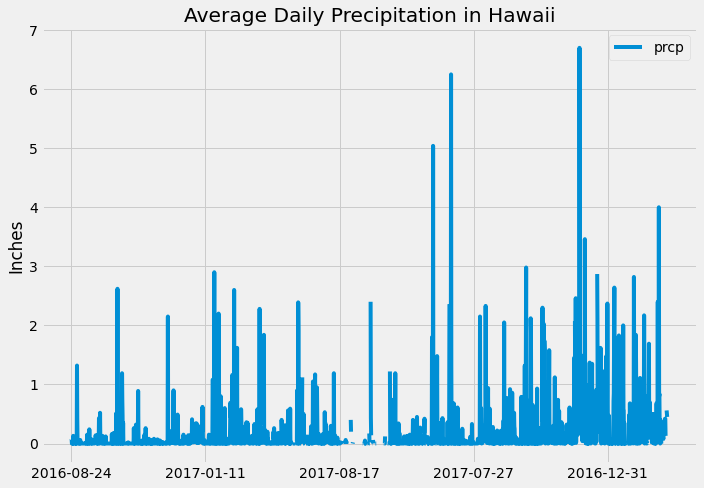

In [73]:
# Use Pandas Plotting with Matplotlib to plot the data

rain_df.plot(figsize=(10, 7))
plt.title('Average Daily Precipitation in Hawaii')
plt.xlabel('')
plt.ylabel('Inches')

plt.tight_layout()
#plt.savefig("../Images/rain.png")
#plt.show()


In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [75]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [76]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [77]:
# Design a query to calculate the total number of stations in the dataset
scount = session.query(Station.station).count()
scount

9

In [78]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (
    session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all())

print(active_stations)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Find min, max and avg for TOBS = 'USC00519281'

max_active=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()

max_active_stats=session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station== 'USC00519281').all()

#add the query results to a dataframe for data headers
max_active_df = pd.DataFrame(max_active_stats, columns=['Station ID', 'Max Temp', 'Min Temp', 'Avg Temp'])
max_active_df.set_index('Station ID', inplace=True)
print(max_active_df)





             Max Temp  Min Temp   Avg Temp
Station ID                                
USC00519281      54.0      85.0  71.663781


In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.

one_year_max_active=session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= date).\
        filter(Measurement.station== 'USC00519281').all()
#print(one_year_max_active)

# Create a dataframe
one_year_max_active_df = pd.DataFrame(one_year_max_active, columns=['Date','Temp'])
one_year_max_active_df.set_index('Date', inplace=True)
one_year_max_active_df.head()
                


,Temp
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


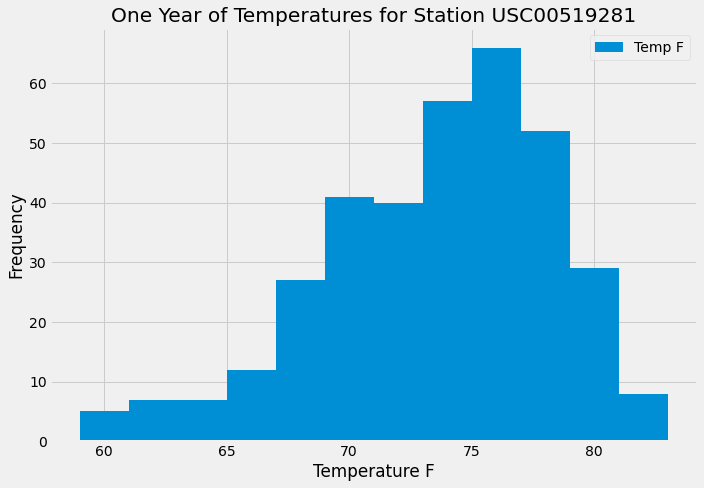

In [90]:
# Plot the results as a histogram

plt.figure(figsize=(10,7))
plt.hist(one_year_max_active_df["Temp"], bins=12)
plt.xlabel('Temperature F')
plt.ylabel("Frequency")
plt.legend(["Temp F"])
plt.title("One Year of Temperatures for Station USC00519281")
plt.tight_layout()
plt.show()



# Close session

In [91]:
# Close Session
session.close()